# Analysis of Data

## Loading Data
**About the data:**

-   This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters.

-   This data is collected from 10 different hospitals across Kerala, India.

-   The unit used is feet to cm

-   Blood pressure entered as systolic and diastolic separately

-   RBS means Random glucose test

-   Beta-HCG cases are mentioned as Case I and II

-   Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18

**Steps involved in Data Preprocessing:**

-   Merging the two files that are sorted into two based on patients with infertility and without infertility

-   Dropping the repeated features

-   Encoding categorical variables (dtype objects)

-   Dealing with missing values

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
#Loading data into the kernels
file_path_with_infertility="PCOS_infertility.csv"
file_path_without_infertility="PCOS_data_without_infertility.xlsx"
PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

## Data Preprocessing

**Steps involved in Data Preprocessing:**

-   Merging the two files that are sorted into two based on patients with infertility and without infertility

-   Dropping the repeated features

-   Encoding categorical variables (dtype objects)

-   Dealing with missing values

In [ ]:
df=PCOS_woinf
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric

<b>trimming</b> column names where there are extra spaces at start and end

In [ ]:
df = df.rename(columns=lambda x: x.strip()) #trimming column names where there are extra spaces at start and end

dropping axes which are <b>not</b> useful

In [ ]:
df = df.drop(['Unnamed: 44'], axis = 1) #dropping not useful axis
df = df.drop(['Sl. No'], axis = 1) #dropping not useful axis
df = df.drop(['Patient File No.'], axis = 1) #dropping not useful axis

In [ ]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
lst_missing_columns = df.columns[df.isna().any()].tolist()
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their median
df.columns[df.isna().any()].tolist() #no more missing values left

[]

Verifying if any missing values are left

In [ ]:
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

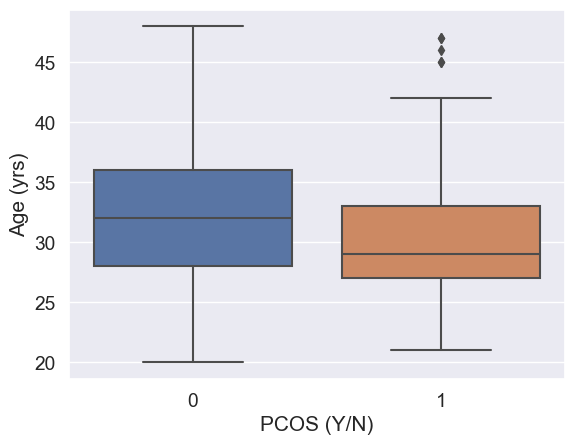

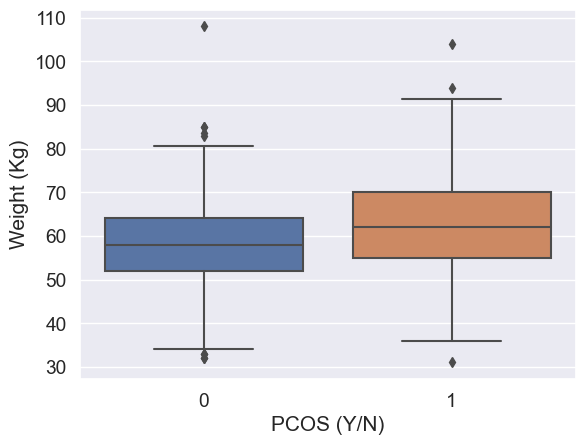

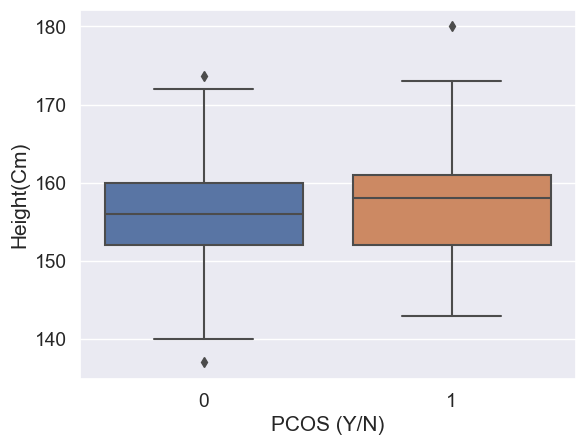

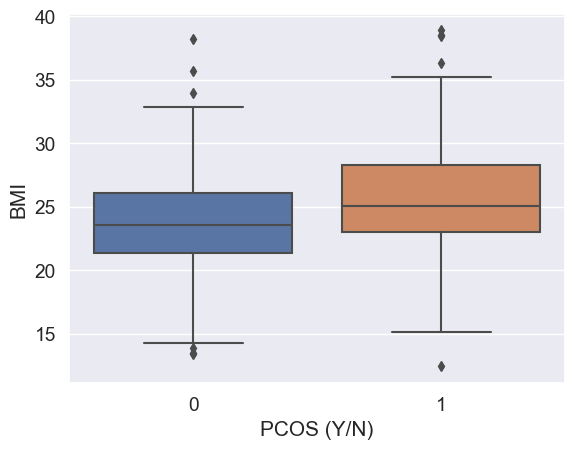

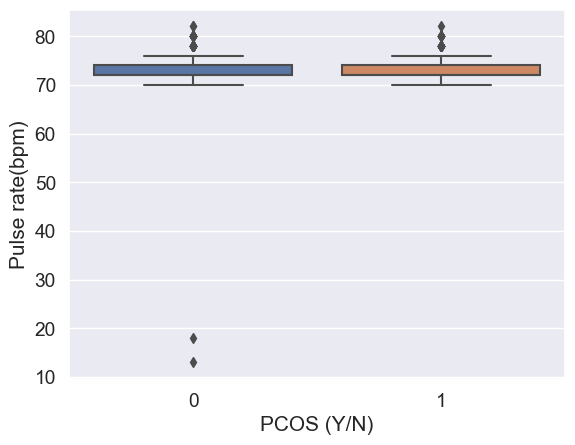

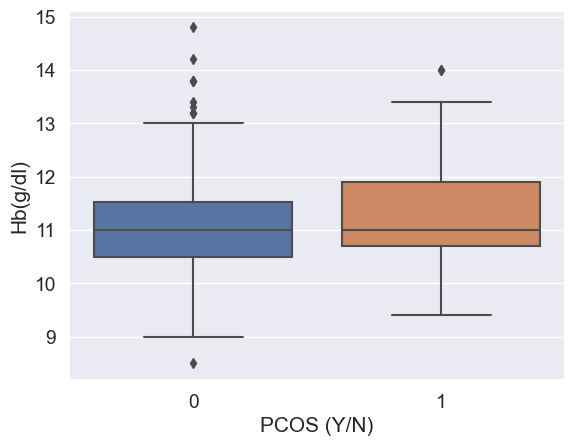

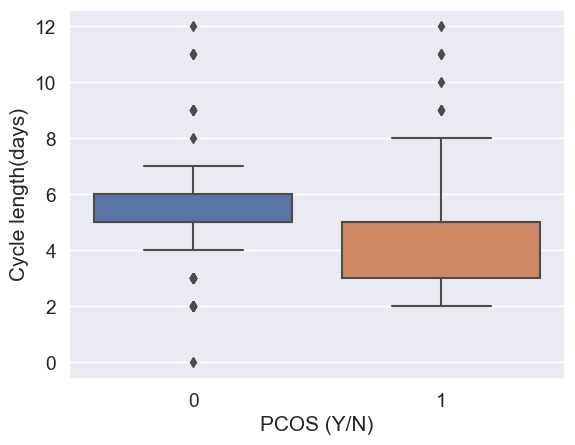

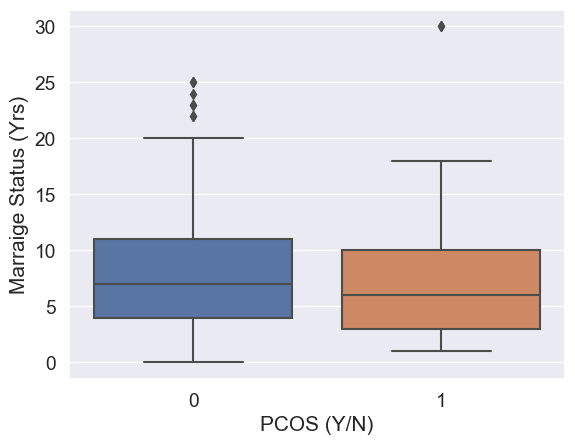

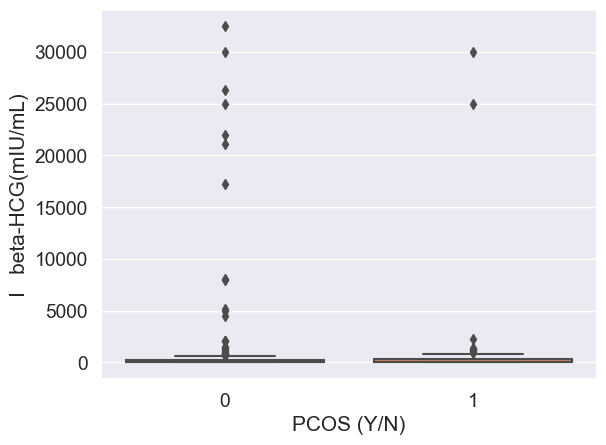

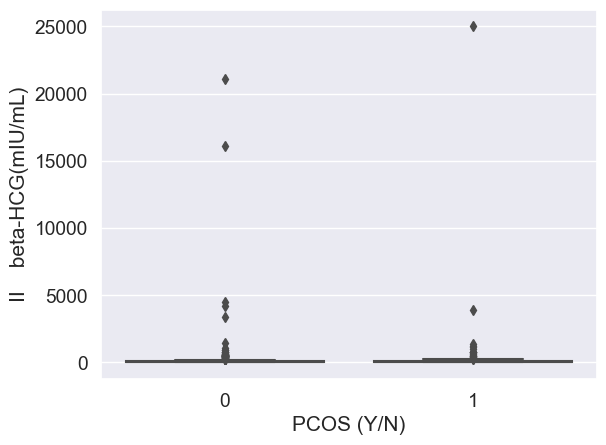

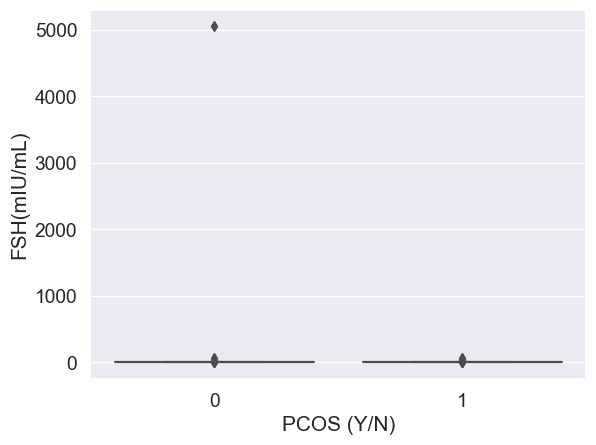

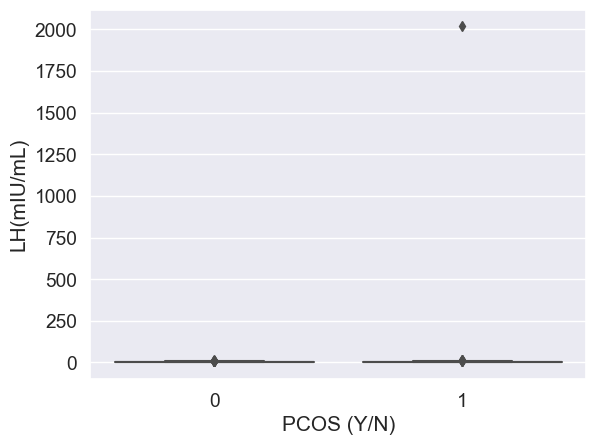

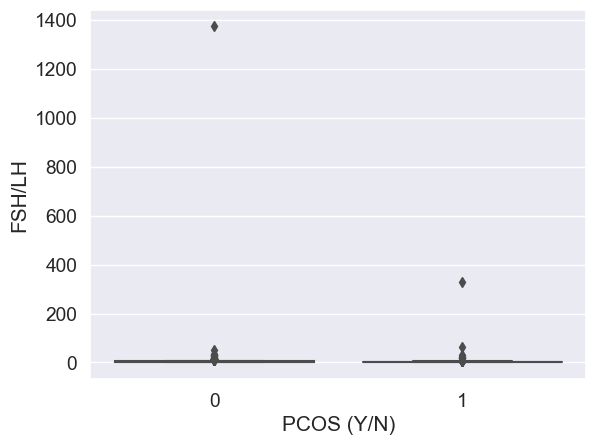

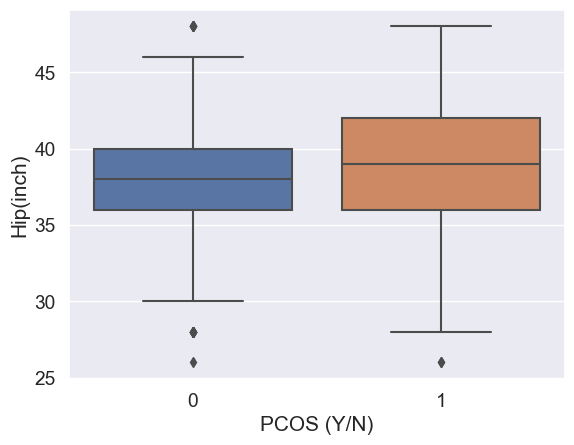

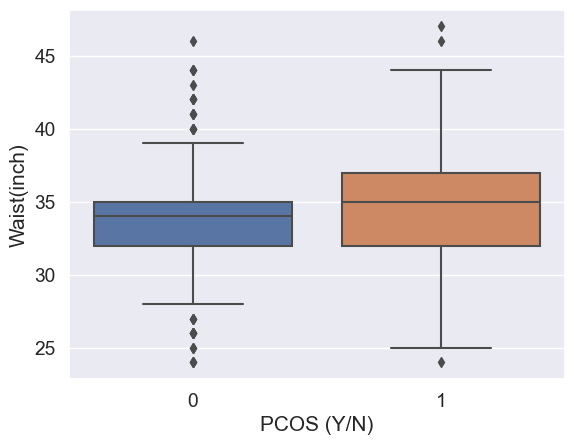

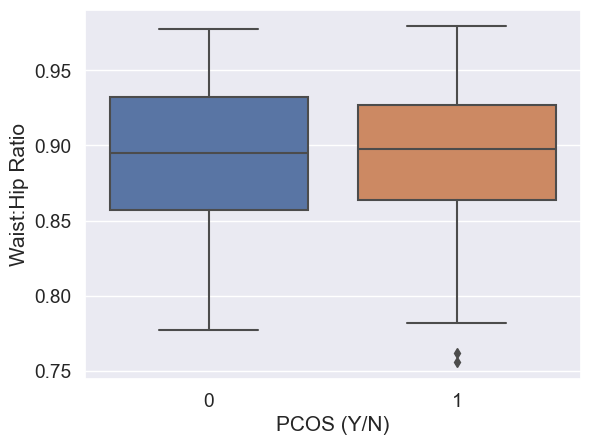

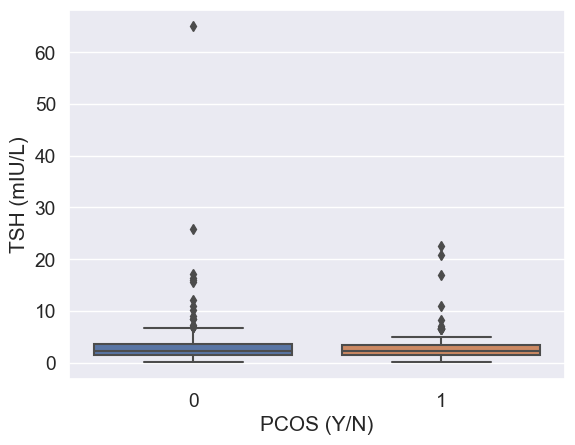

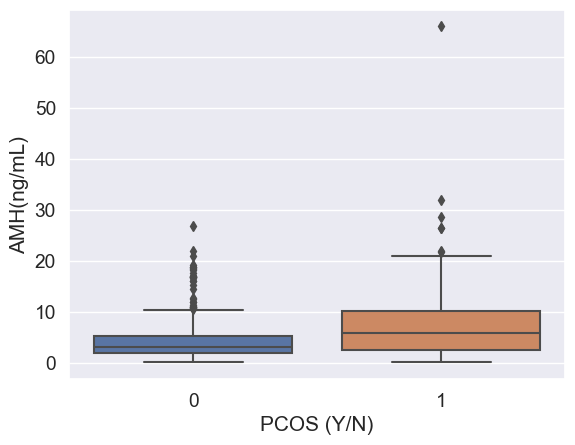

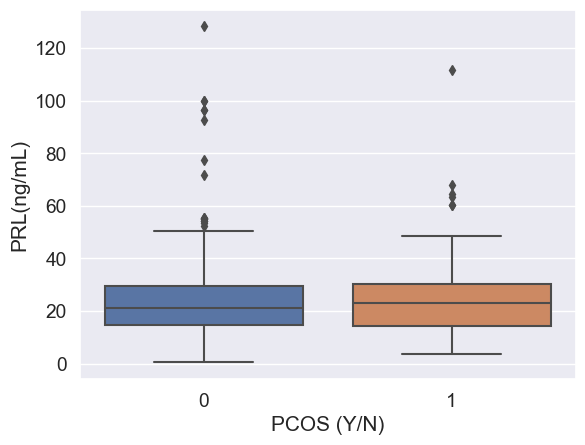

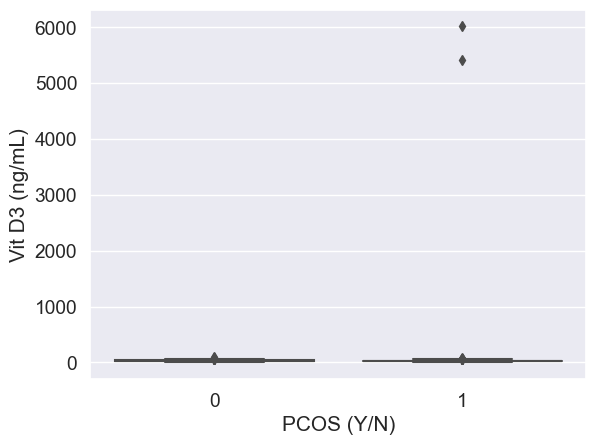

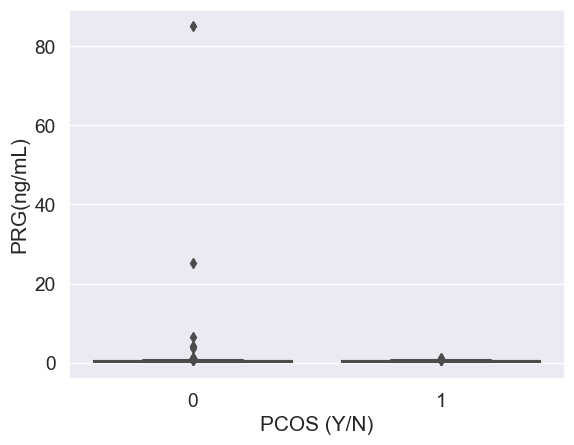

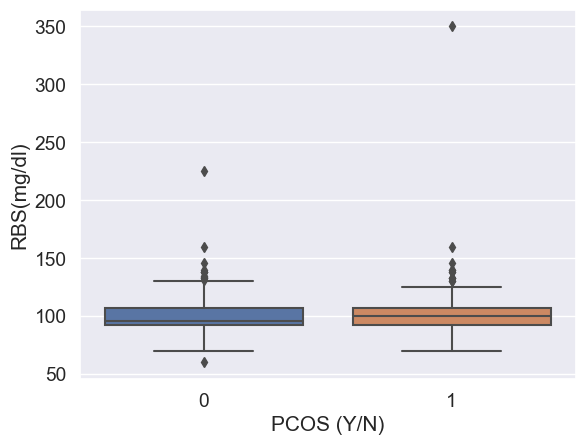

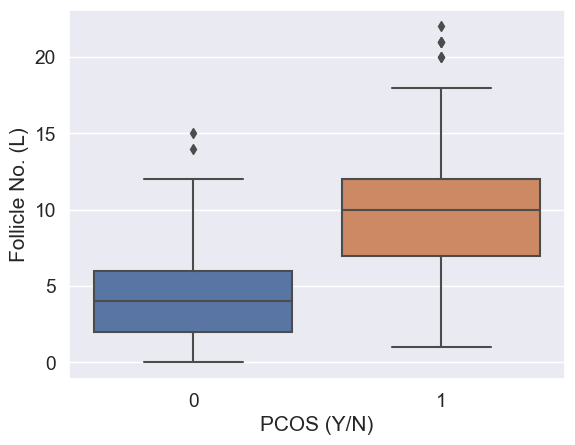

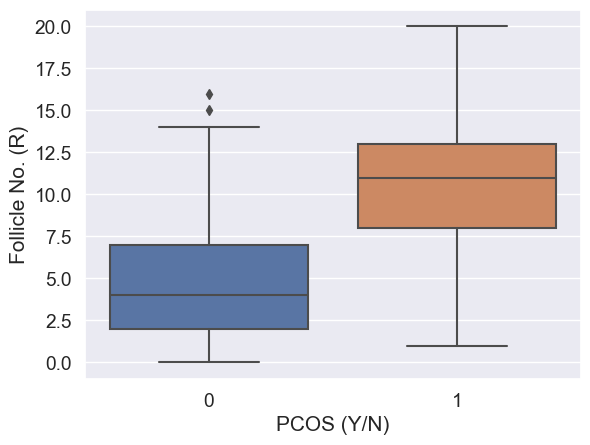

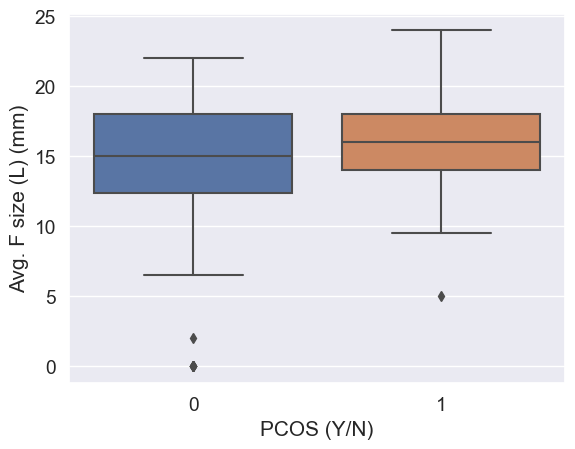

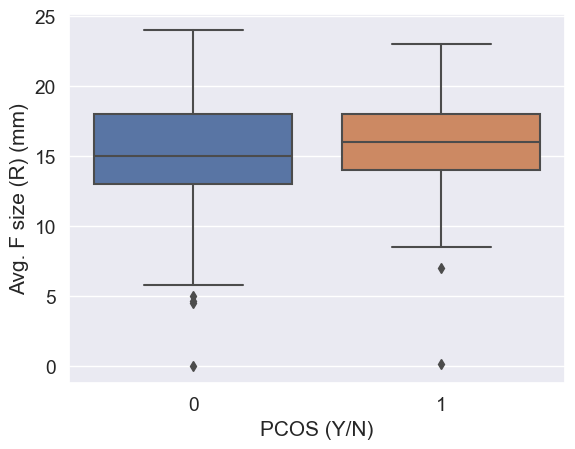

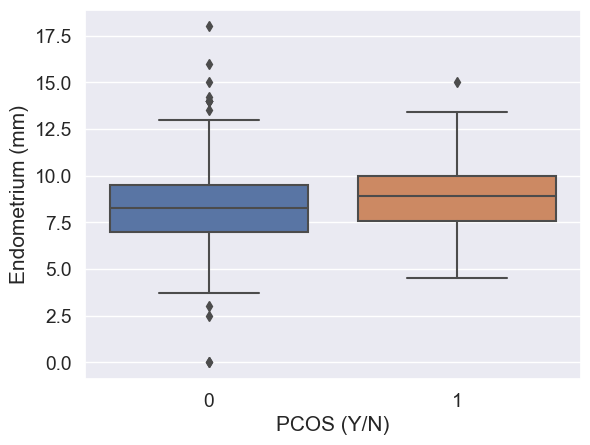

In [ ]:
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=df)
    plt.show()

## Observations from boxplot
- Higher the follicle number more the tendancy of PCOS
- Patients with lower cycle lengths means more tendancy of PCOS
- The average age of patients diagnosed with PCOS is 30 years

In [ ]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.',how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head()

,Sl. No_x,Patient File No.,PCOS (Y/N)_x,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


Everything looks alright we can work with this.

We have a dataset of shape 5 rows × 44 columns.

Let's head up to the next step and have a further look at the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No_x                  541 non-null    int64  
 1   Patient File No.          541 non-null    int64  
 2   PCOS (Y/N)_x              541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

Encoding categorical variables (dtype objects)

In [ ]:
#Having a look at the data with dtype objects

data["AMH(ng/mL)_x"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL)_x, dtype: float64

In [ ]:
#Similarly

data["II    beta-HCG(mIU/mL)_x"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL)_x, dtype: float64

After having a look at this info we may conclude that:

Some numeric data are saved as strings.
There are some missing values. Namely, Marriage Status (Yrs)& Fast food (Y/N)

In [ ]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)_x"] = pd.to_numeric(data["AMH(ng/mL)_x"], errors='coerce')
data["II    beta-HCG(mIU/mL)_x"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)_x"], errors='coerce')

#Dealing with missing values.
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)_x'].fillna(data['II    beta-HCG(mIU/mL)_x'].median(),inplace=True)
data['AMH(ng/mL)_x'].fillna(data['AMH(ng/mL)_x'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

## Exploratory Data Analysis

**Steps involved in EDA**

-   Feature selection based on the correlation factor
-   Patterns Of Length Of The Menstrual Cycle
-   Patterns Of BMI
-   Patterns Of Irregularity In Mensuration
-   Number of Follicles
-   Some Miscellaneous EDA

**Let's explore features**

In [ ]:
# Having a look at some basic statistical details.
data.describe()

,Sl. No_x,Patient File No.,PCOS (Y/N)_x,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


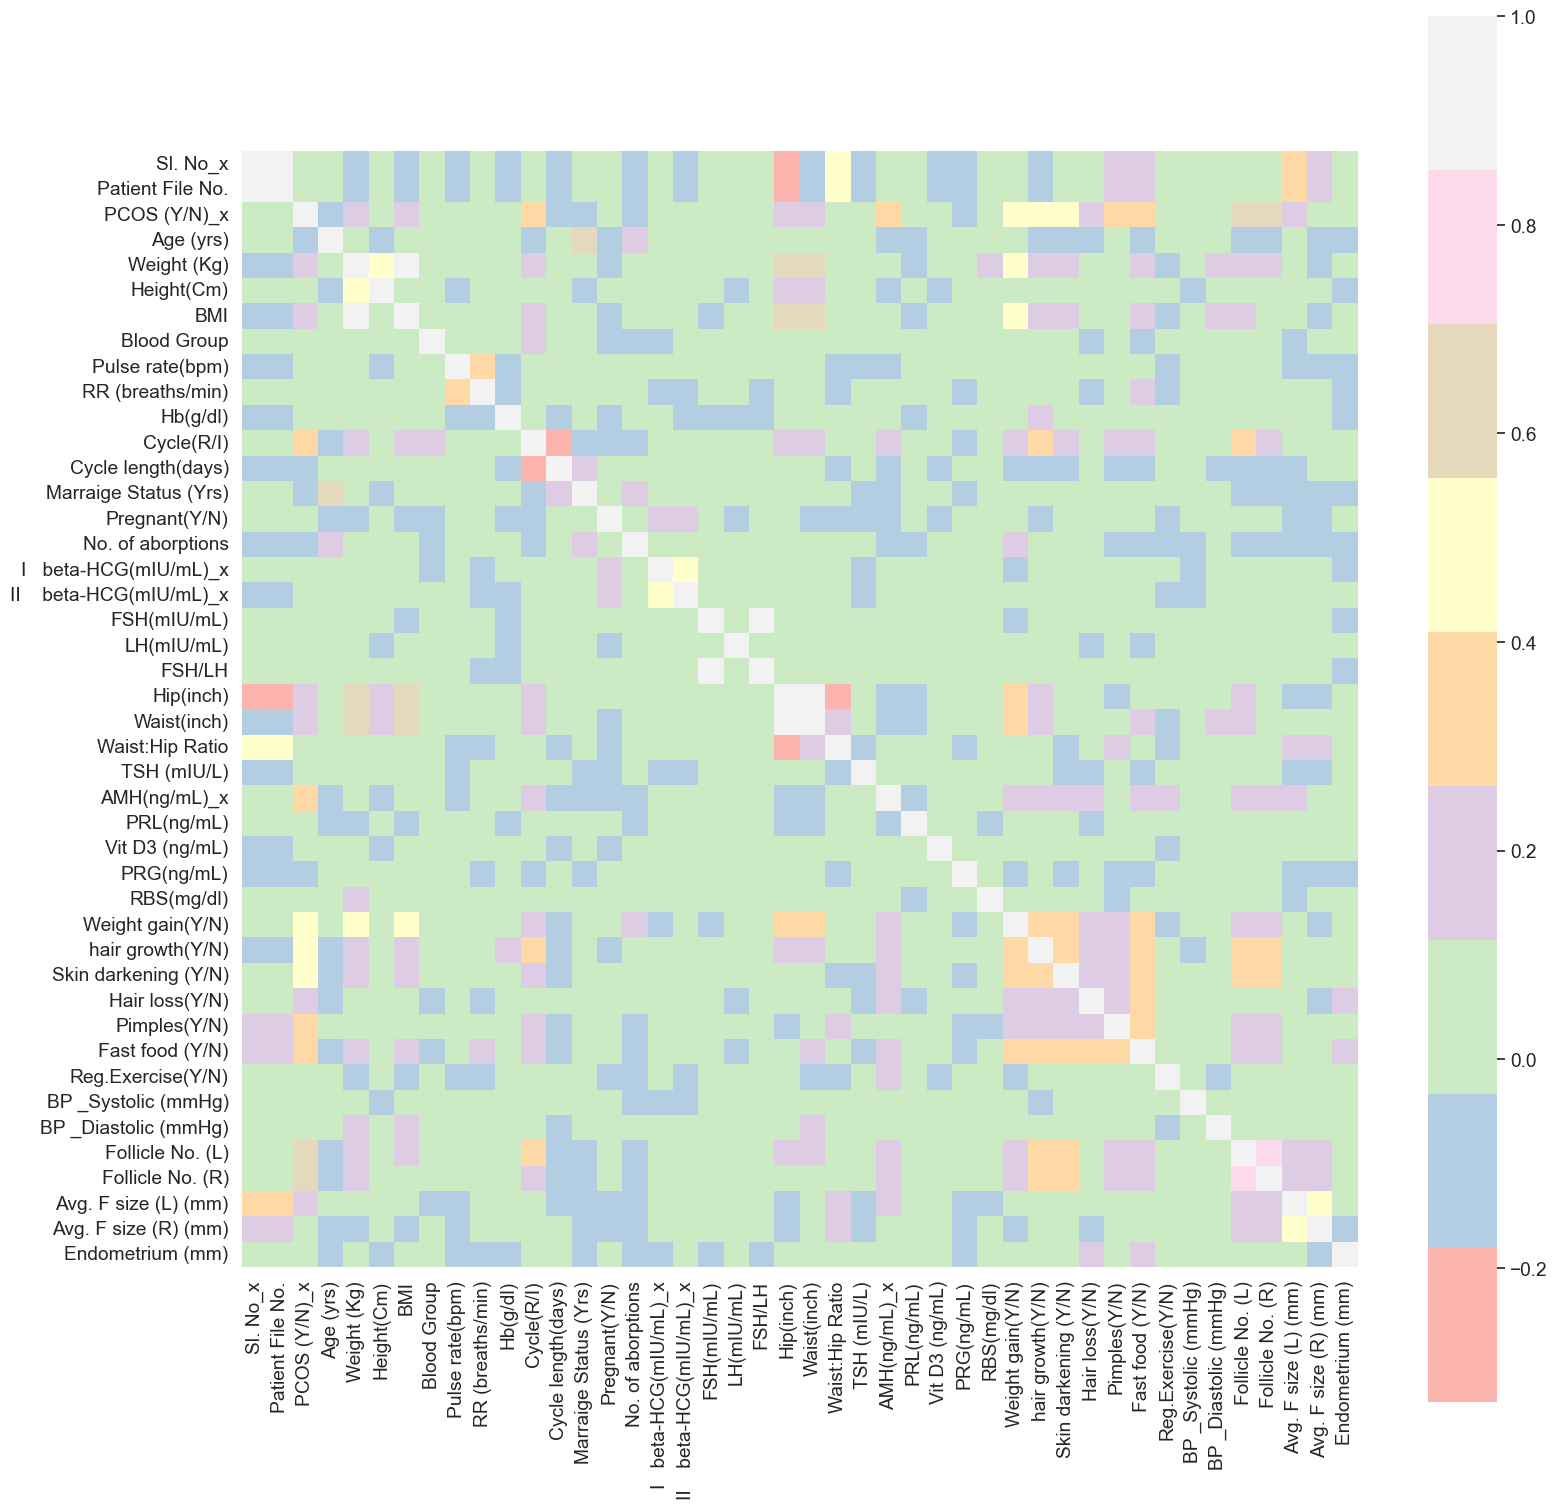

In [ ]:

#Examaning a correlation matrix of all the features
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [ ]:
#How all the features correlate with the PCOS

corrmat["PCOS (Y/N)_x"].sort_values(ascending=False)

PCOS (Y/N)_x                1.000000
Follicle No. (R)            0.648327
Follicle No. (L)            0.603346
Skin darkening (Y/N)        0.475733
hair growth(Y/N)            0.464667
Weight gain(Y/N)            0.441047
Cycle(R/I)                  0.401644
Fast food (Y/N)             0.376183
Pimples(Y/N)                0.286077
AMH(ng/mL)_x                0.264141
Weight (Kg)                 0.211938
BMI                         0.199534
Hair loss(Y/N)              0.172879
Waist(inch)                 0.164598
Hip(inch)                   0.162297
Avg. F size (L) (mm)        0.132992
Endometrium (mm)            0.106648
Avg. F size (R) (mm)        0.097690
Pulse rate(bpm)             0.091821
Hb(g/dl)                    0.087170
Vit D3 (ng/mL)              0.085494
Height(Cm)                  0.068254
Reg.Exercise(Y/N)           0.065337
LH(mIU/mL)                  0.063879
Sl. No_x                    0.060998
Patient File No.            0.060998
RBS(mg/dl)                  0.048922
B

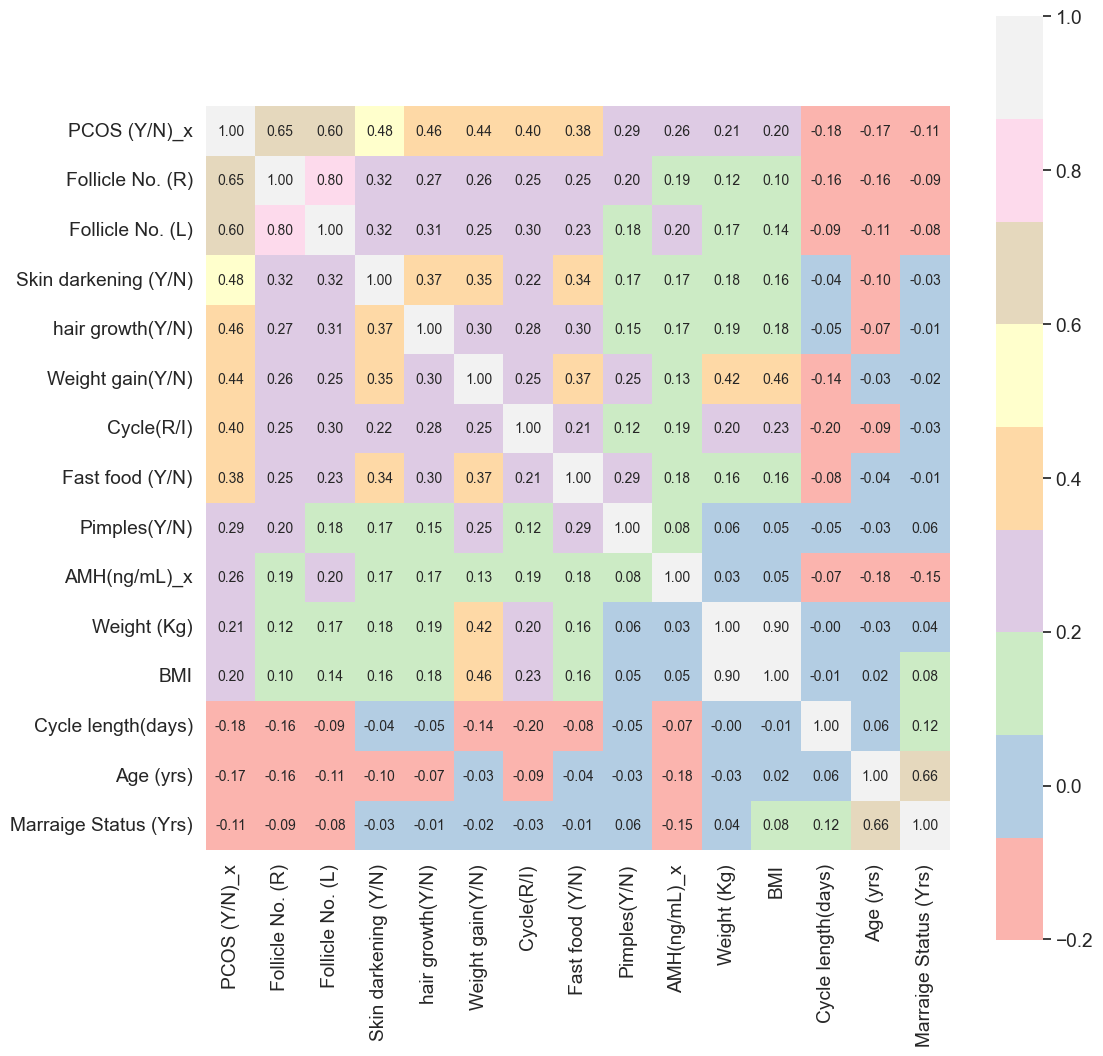

In [ ]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)_x")["PCOS (Y/N)_x"].index
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)_x")["PCOS (Y/N)_x"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Patterns Of Length Of The Menstrual Cycle

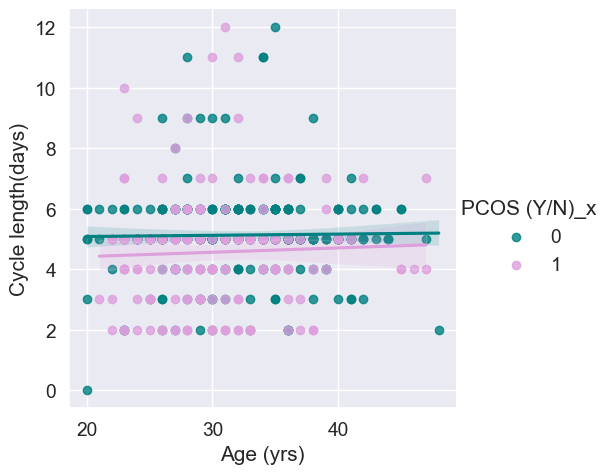

In [ ]:
# Length of menstrual phase in PCOS vs normal
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)_x",palette=color)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

## Patterns Of BMI

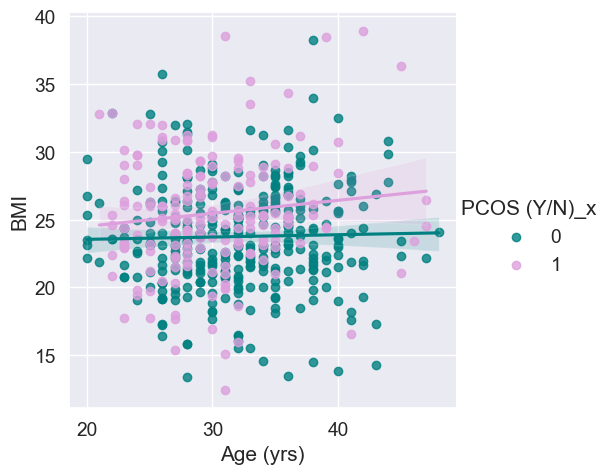

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal.
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)_x", palette= color )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

**Patterns Of Irregularity In Mensuration**

*There is no clarity on what this feature and its values indicate but,*

**Apparently in the feature "Cycle(R/I)" value:**

**4** indicates irregular menstrual cycle

**2** indicates a regular menstrual cycle

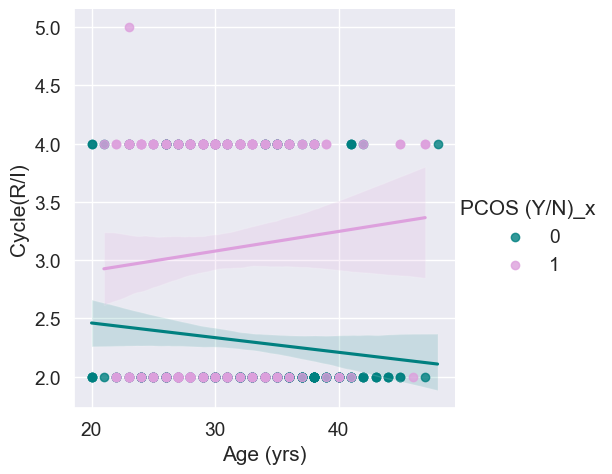

In [ ]:
# cycle IR wrt age
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)_x",palette=color)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

**Number Of Follicles**

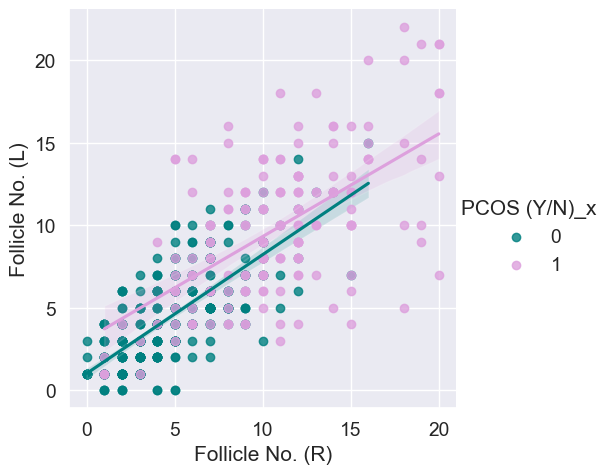

In [ ]:
# Distribution of follicles in both ovaries.
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)_x",palette=color)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. Thia is curious let's exlore it with boxen plot.

C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


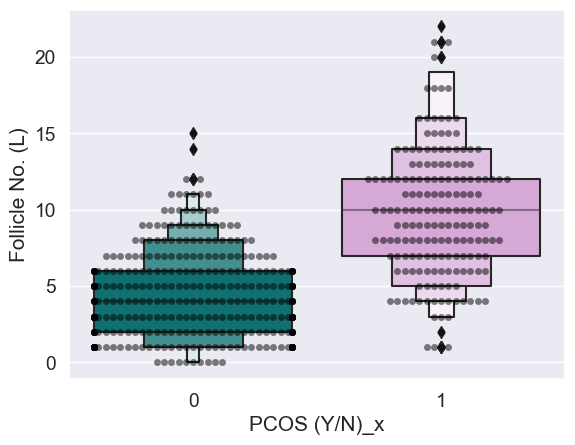

C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


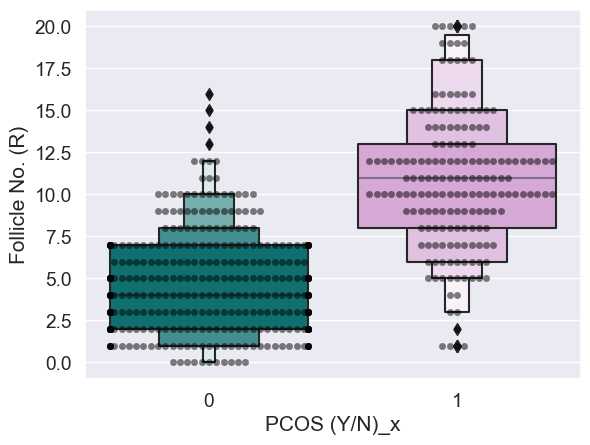

In [ ]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)_x"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)_x"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well.
Some Miscellaneous EDA

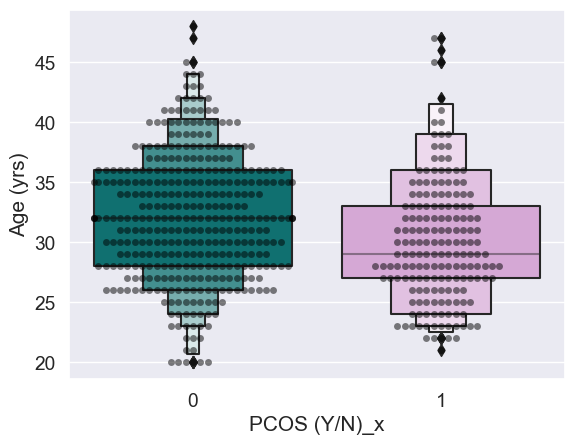

C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


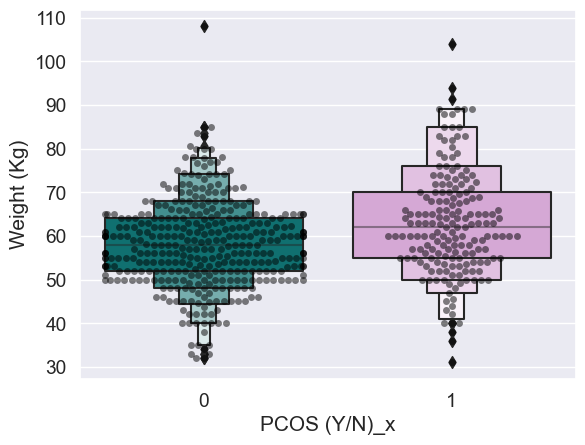

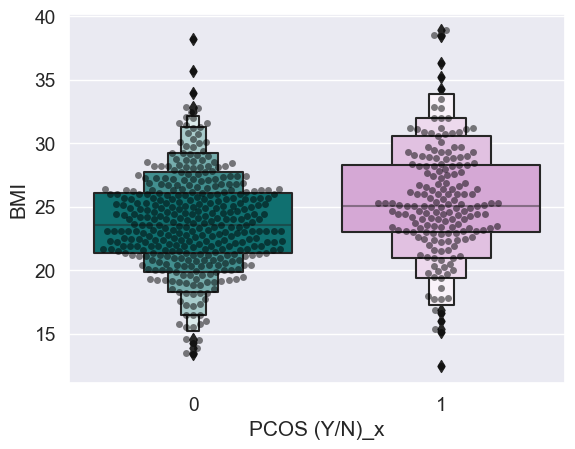

C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


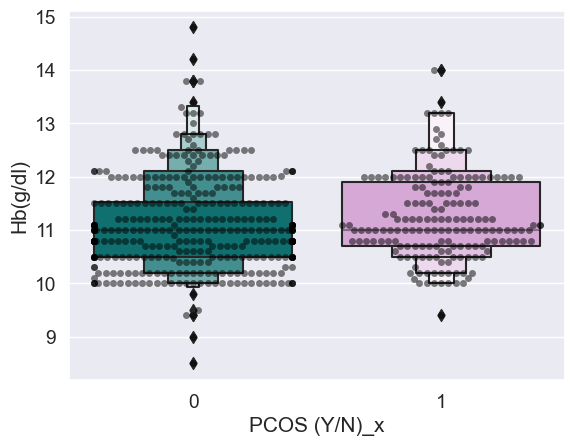

C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


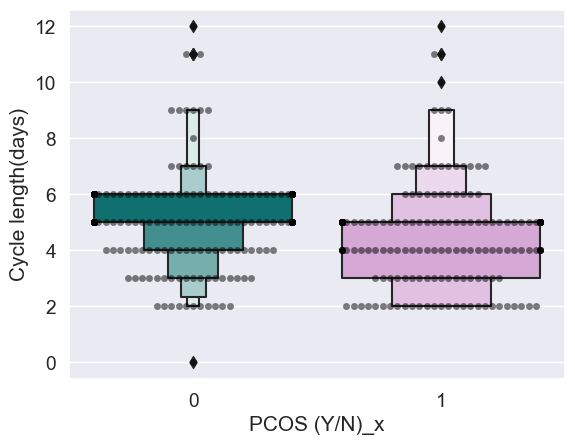

C:\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


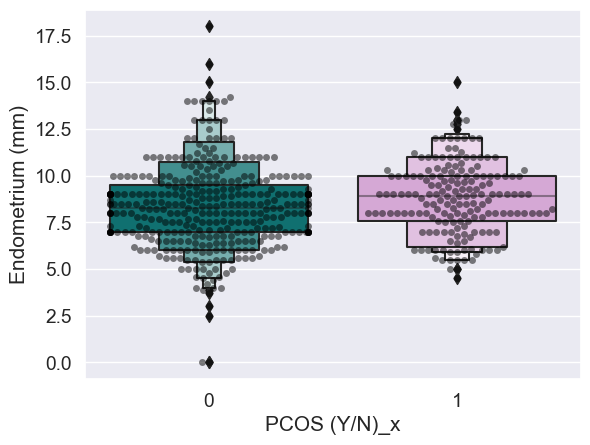

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)_x"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)_x"], y=data[i], palette=color)
    plt.show()

## Model Building

Steps involved in Model Building:
- Assigning values to features as X and target as y
- Split test and training sets
- Fitting a vanilla model as the base Random Forest model
- Hyperparameter tuning using GridSearch CV
- Fitting the final model
- Evaluating the confusion matrix
- Evaluating the classification report

In [ ]:
pcos = pd.read_csv("PCOS_raw_file_4.csv")
pcos.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.326531,31.430427,59.637291,156.471792,24.315380,13.801484,73.252319,19.237477,11.161558,2.554731,...,0.491651,0.515770,0.246753,114.641929,76.935065,6.116883,6.643785,15.018182,15.449666,8.472115
std,0.469380,5.414105,11.041874,6.039703,4.061738,1.843182,4.437858,1.687260,0.868019,0.899334,...,0.500395,0.500215,0.431522,7.391079,5.574892,4.223240,4.444538,3.565130,3.319807,2.166571
min,0.000000,20.000000,31.000000,137.000000,12.420000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.675000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.240000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.650000,15.000000,74.000000,20.000000,11.750000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              539 non-null    int64  
 1   Age (yrs)               539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    float64
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    int64  
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of aborptions       539 non-null    int64  
 14  I   beta-HCG(mIU/mL)    539 non-null    fl

In [ ]:
y = pcos["PCOS (Y/N)"]
X = pcos.drop(["PCOS (Y/N)"], axis=1)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
pcos_scaled = sc.fit_transform(pcos)

In [ ]:
pcos_scaled = pd.DataFrame(pcos_scaled)
pcos_scaled

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,0.285714,0.176623,0.348837,0.259819,0.571429,0.942029,0.500000,0.314286,0.000000,...,0.0,1.0,0.0,0.765625,0.782609,0.136364,0.15,0.750000,0.750000,0.472222
1,0.0,0.571429,0.441558,0.569767,0.472054,0.571429,0.884058,0.333333,0.507937,0.000000,...,0.0,0.0,0.0,0.843750,0.673913,0.136364,0.25,0.625000,0.583333,0.205556
2,1.0,0.464286,0.490909,0.651163,0.485272,0.000000,0.855072,0.166667,0.523810,0.000000,...,1.0,1.0,0.0,0.843750,0.782609,0.590909,0.75,0.750000,0.833333,0.555556
3,0.0,0.607143,0.441558,0.255814,0.651435,0.285714,0.855072,0.333333,0.555556,0.000000,...,0.0,0.0,0.0,0.843750,0.673913,0.090909,0.10,0.625000,0.583333,0.416667
4,0.0,0.178571,0.272727,0.558140,0.288520,0.000000,0.855072,0.166667,0.238095,0.000000,...,0.0,0.0,0.0,0.843750,0.782609,0.136364,0.20,0.666667,0.583333,0.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.0,0.535714,0.246753,0.641674,0.229607,0.857143,0.855072,0.000000,0.396825,0.000000,...,0.0,0.0,0.0,0.765625,0.673913,0.045455,0.00,0.729167,0.416667,0.372222
535,0.0,0.357143,0.418182,0.488372,0.486405,0.571429,0.855072,0.166667,0.365079,0.000000,...,0.0,0.0,0.0,0.765625,0.673913,0.409091,0.35,0.791667,0.750000,0.455556
536,0.0,0.571429,0.298701,0.348837,0.414653,0.285714,0.884058,0.333333,0.365079,0.000000,...,0.0,0.0,0.0,0.765625,0.782609,0.045455,0.00,0.750000,0.375000,0.405556
537,0.0,0.250000,0.246753,0.302326,0.369335,0.571429,0.884058,0.333333,0.555556,0.666667,...,1.0,0.0,0.0,0.765625,0.673913,0.318182,0.30,0.750000,0.666667,0.638889


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 99, stratify = pcos["PCOS (Y/N)"])

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (431, 41)
X_test shape: (108, 41)
Y_train shape: (431,)
Y_test shape: (108,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model =  LogisticRegression(solver='lbfgs',random_state = 90,max_iter=8000)
lr=logreg_model.fit(X_train, Y_train)
lr

LogisticRegression(max_iter=8000, random_state=90)

In [ ]:
filename = 'Logistic Regression.sav'
pickle.dump(lr, open(filename, 'wb'))
loaded_model_lr = pickle.load(open(filename, 'rb'))
Y_pred_logreg = loaded_model_lr.predict(X_test)

In [ ]:
#Y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 92.5925925925926


[Text(0.5, 16.049999999999997, 'Predicted'),
 Text(43.25, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')]

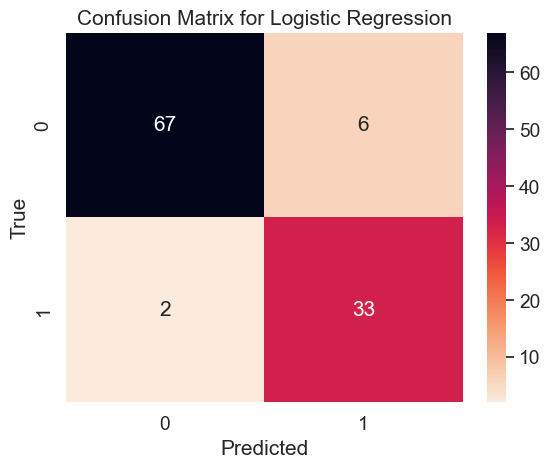

In [ ]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(Y_test, Y_pred_logreg)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Logistic Regression")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_logreg))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        73
           1       0.85      0.94      0.89        35

    accuracy                           0.93       108
   macro avg       0.91      0.93      0.92       108
weighted avg       0.93      0.93      0.93       108



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 99)
dec_tree=decisiontree_model.fit(X_train, Y_train)

In [ ]:
filename = 'Decision Tree.sav'
pickle.dump(dec_tree, open(filename, 'wb'))
loaded_model_dec_tree = pickle.load(open(filename, 'rb'))
Y_pred_decisiontree = loaded_model_dec_tree.predict(X_test)

In [ ]:
#Y_pred_decisiontree = decisiontree_model.predict(X_test)
accuracy_decisiontree = accuracy_score(Y_test, Y_pred_decisiontree)
print("Decision tree: " + str(accuracy_decisiontree * 100))

Decision tree: 90.74074074074075


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.86      0.86      0.86        35

    accuracy                           0.91       108
   macro avg       0.89      0.89      0.89       108
weighted avg       0.91      0.91      0.91       108



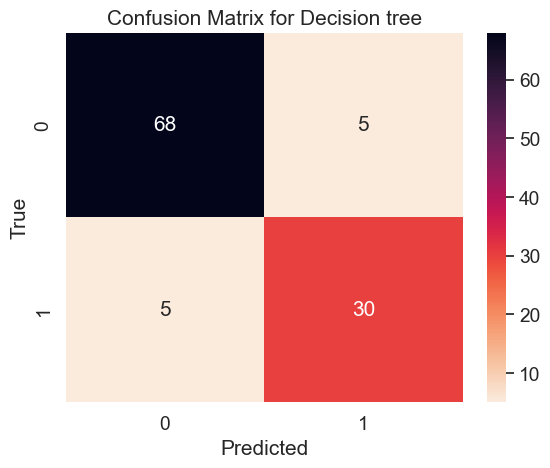

In [ ]:
# Confusion matrix for  Decision tree
cm = confusion_matrix(Y_test, Y_pred_decisiontree)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Decision tree")
print(classification_report(Y_test, Y_pred_decisiontree))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=9)
rf=rf_model.fit(X_train,Y_train)

In [ ]:
filename = 'Random Forest.sav'
pickle.dump(rf, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
Y_pred_rf = loaded_model.predict(X_test)

In [ ]:
#Y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Random Forest: " + str(accuracy_rf * 100))

Random Forest: 94.44444444444444


[Text(0.5, 16.049999999999997, 'Predicted'),
 Text(43.25, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion Matrix for Random Forest ')]

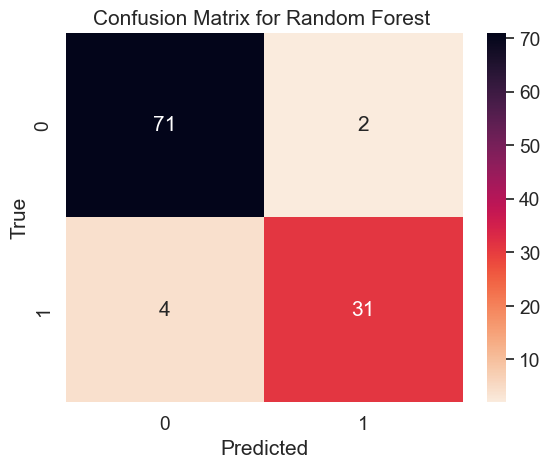

In [ ]:
# Confusion matrix for  Random Forest
cm = confusion_matrix(Y_test, Y_pred_rf)
cm
s = sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
s.set(xlabel='Predicted', ylabel='True',title="Confusion Matrix for Random Forest ")

In [ ]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.94      0.89      0.91        35

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.94       108
weighted avg       0.94      0.94      0.94       108

